In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.feature_selection import chi2
from sklearn.model_selection import GridSearchCV


from utils import *


# Carga de datos

In [2]:

train_data = pd.read_csv('data/data_train.csv')
test_data = pd.read_csv('data/data_test.csv')


train_info = train_data.info()
test_info = test_data.info()

train_data.head(), test_data.head(), train_info, test_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19370 entries, 0 to 19369
Columns: 299 entries, target to v298
dtypes: int64(299)
memory usage: 44.2 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Columns: 299 entries, target to v298
dtypes: int64(299)
memory usage: 11.0 MB


(   target  v1  v2  v3  v4  v5  v6  v7  v8  v9  ...  v289  v290  v291  v292  \
 0       1   1   1   1   1   1   0   1   1   1  ...     0     0     0     0   
 1       1   1   1   1   1   0   0   0   1   1  ...     0     0     0     0   
 2       1   1   1   1   1   1   1   0   1   1  ...     0     0     0     0   
 3       0   1   1   1   1   1   0   1   1   1  ...     0     0     0     0   
 4       0   1   1   0   0   0   0   0   0   1  ...     0     0     0     0   
 
    v293  v294  v295  v296  v297  v298  
 0     0     0     0     0     0     0  
 1     0     0     0     1     0     0  
 2     0     0     0     0     0     0  
 3     0     1     0     0     0     0  
 4     0     0     0     0     0     0  
 
 [5 rows x 299 columns],
    target  v1  v2  v3  v4  v5  v6  v7  v8  v9  ...  v289  v290  v291  v292  \
 0       0   1   1   1   1   1   0   1   1   1  ...     0     0     0     0   
 1       0   1   1   1   1   0   1   0   1   1  ...     0     0     0     0   
 2       1   1

Revisión de proporciones en el conjunto de train

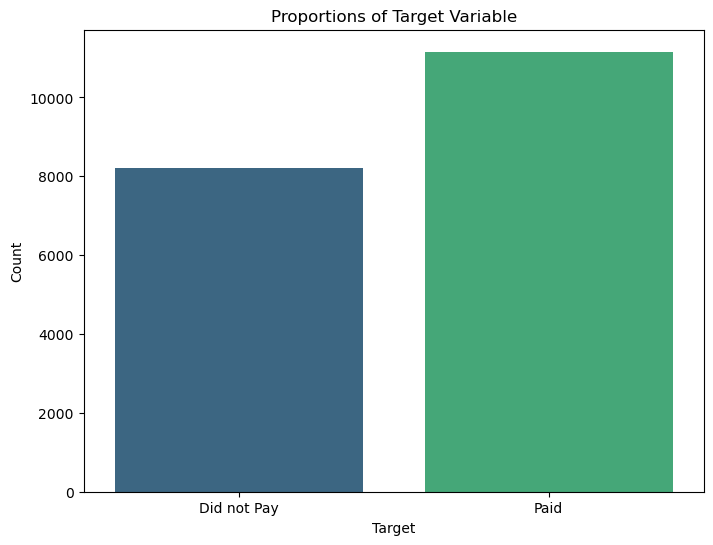

In [4]:

target_distribution = train_data['target'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=target_distribution.index, y=target_distribution.values, palette='viridis')
plt.title('Proportions of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks([0, 1], ['Did not Pay', 'Paid'])
plt.show()



In [5]:

X = train_data.drop(columns='target')
y = train_data['target']

# Modelo base de Regresión Logística con selección de variables

Dado que se tiene como predictores a únicamente variables dicotómicas, se usa la prueba de Chi Square para seleccionar aquellas variables que potencialmente puedan servir al modelo

In [6]:

chi2_stat, p_values = chi2(X, y)


chi2_results = pd.DataFrame({'Feature': X.columns, 'Chi2': chi2_stat, 'p-value': p_values})


chi2_results = chi2_results.sort_values(by='p-value', ascending=True)


chi2_top = chi2_results.head(20)
chi2_top


,Feature,Chi2,p-value
60,v61,226.610875,3.269472e-51
54,v55,186.141662,2.210891e-42
24,v25,148.233514,4.217804e-34
21,v22,145.910233,1.358206e-33
26,v27,131.042065,2.424145e-30
5,v6,128.802037,7.493124e-30
15,v16,118.810987,1.151999e-27
100,v101,112.978410,2.181373e-26
28,v29,105.457143,9.697270e-25
68,v69,104.642913,1.462547e-24


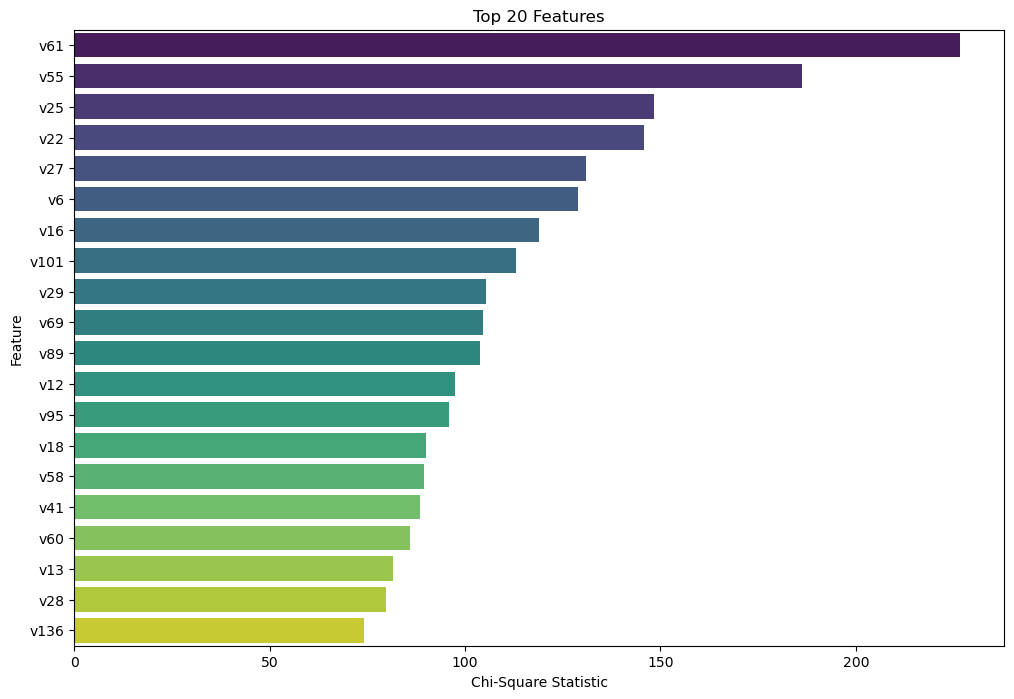

In [7]:

plt.figure(figsize=(12, 8))
sns.barplot(x='Chi2', y='Feature', data=chi2_top, palette='viridis')
plt.title('Top 20 Features')
plt.xlabel('Chi-Square Statistic')
plt.ylabel('Feature')
plt.show()


In [11]:
# Lo anterior ayuda a seleccionar las variables más significativas

significant_features = chi2_top['Feature'].values
X_significant = X[significant_features]


X_train_sig = X_significant
y_train = train_data['target']

# Modelo
logistic_model_sig = LogisticRegression(max_iter=1000, solver='lbfgs')
logistic_model_sig.fit(X_train_sig, y_train)

# Generación de probas 
y_train_pred_proba_sig = logistic_model_sig.predict_proba(X_train_sig)[:, 1]
y_train_pred_sig = logistic_model_sig.predict(X_train_sig)




## Validación

In [12]:
# Validación en test

X_test_sig = test_data[significant_features]
y_test = test_data['target']

# Generación de probas 
y_test_pred_proba_sig = logistic_model_sig.predict_proba(X_test_sig)[:, 1]
y_test_pred_sig = logistic_model_sig.predict(X_test_sig)



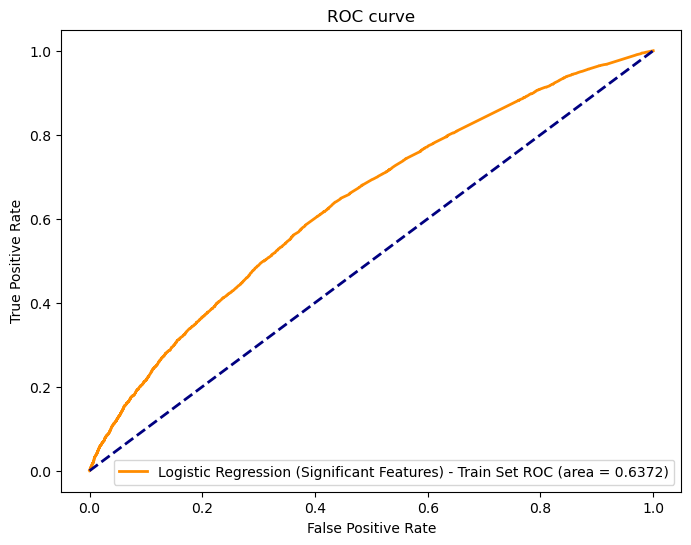

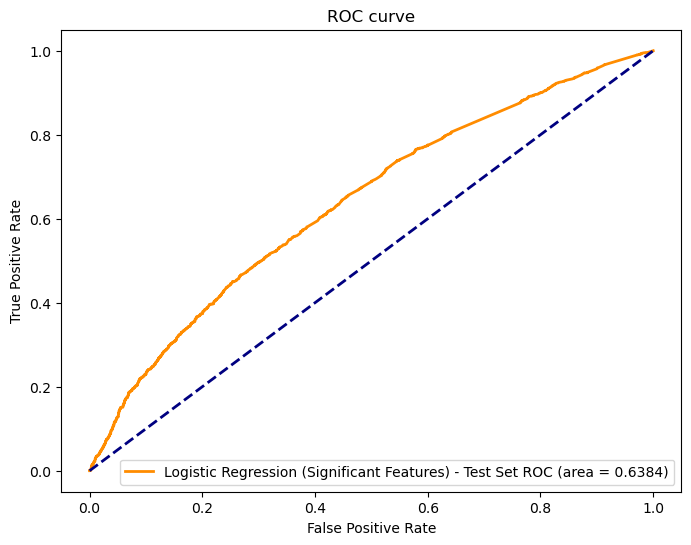

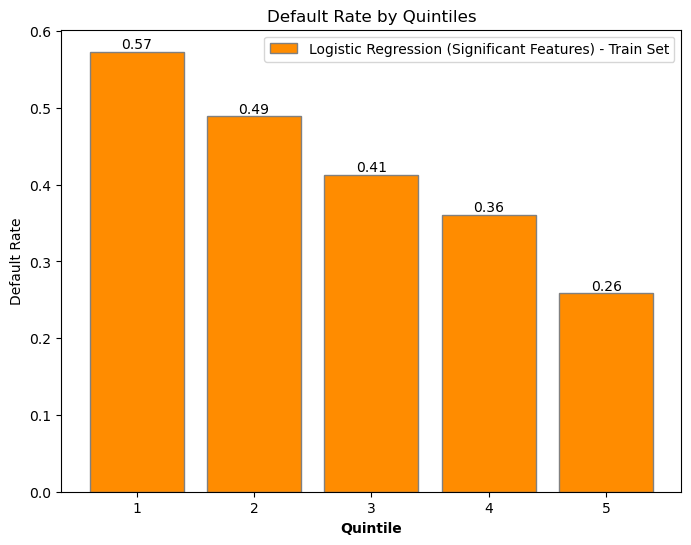

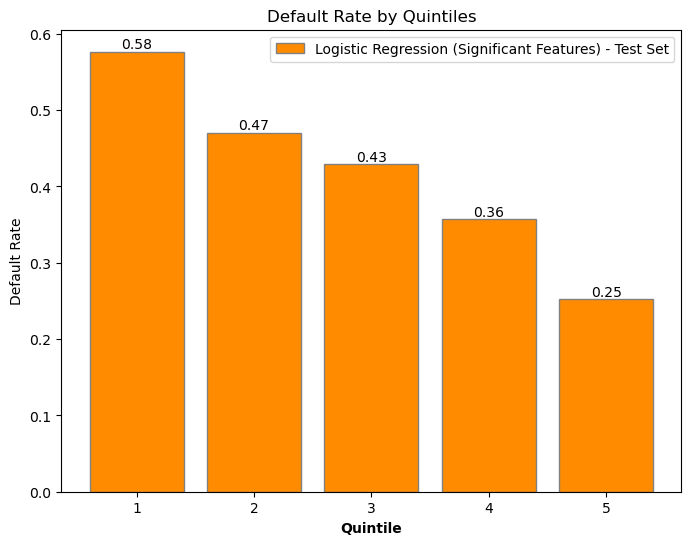

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


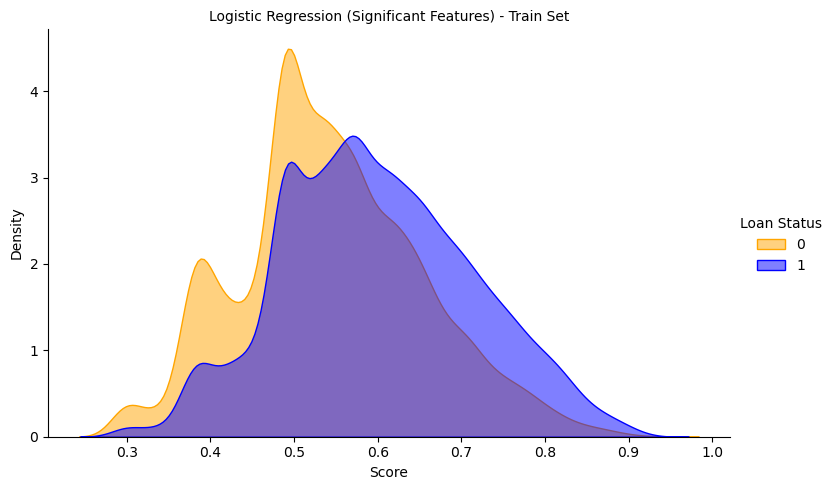

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


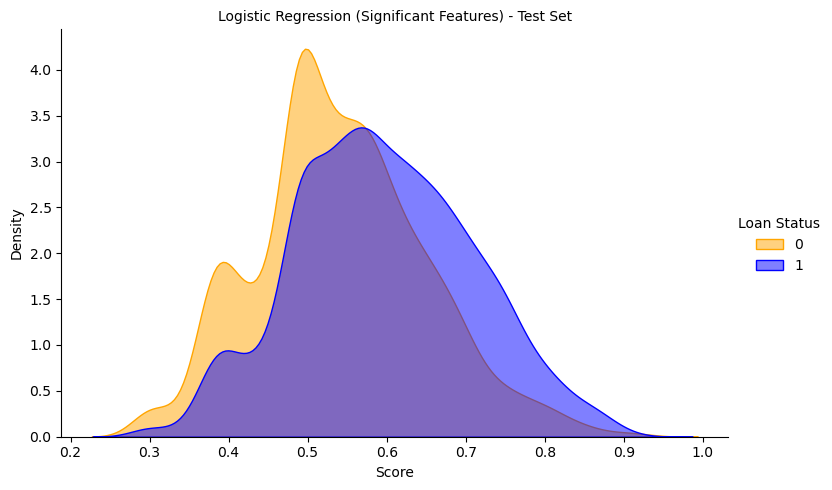

In [13]:
plot_roc_curve(y_train_pred_proba_sig, y_train, "Logistic Regression (Significant Features) - Train Set")
plot_roc_curve(y_test_pred_proba_sig, y_test, "Logistic Regression (Significant Features) - Test Set")


default_rate_by_quintile(y_train_pred_proba_sig, y_train, "Logistic Regression (Significant Features) - Train Set")
default_rate_by_quintile(y_test_pred_proba_sig, y_test, "Logistic Regression (Significant Features) - Test Set")


metrics_df_sig_train = calculate_metrics(y_train_pred_proba_sig, y_train_pred_sig, y_train)
metrics_df_sig_test = calculate_metrics(y_test_pred_proba_sig, y_test_pred_sig, y_test)


plot_density(y_train_pred_proba_sig, y_train, "Logistic Regression (Significant Features) - Train Set")
plot_density(y_test_pred_proba_sig, y_test, "Logistic Regression (Significant Features) - Test Set")





# Modelo con regularización y PCA

In [14]:
# PCA

pca = PCA(n_components=0.95)  
X_train_pca = pca.fit_transform(X)
X_test_pca = pca.transform(test_data.drop(columns='target'))

n_components = X_train_pca.shape[1]

# Regularización L1
logistic_l1 = LogisticRegression(penalty='l1', solver='saga', max_iter=1000)


param_grid = {'C': [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]} # Como nota, el modelo no mejora cuando se incrementa el grid
grid_search = GridSearchCV(logistic_l1, param_grid, cv=5, scoring='accuracy')


grid_search.fit(X_train_pca, y_train)

best_C = grid_search.best_params_['C']

# Modelo

logistic_best_l1 = LogisticRegression(penalty='l1', solver='saga', C=best_C, max_iter=1000)
logistic_best_l1.fit(X_train_pca, y_train)


y_train_pred_proba_pca = logistic_best_l1.predict_proba(X_train_pca)[:, 1]
y_train_pred_pca = logistic_best_l1.predict(X_train_pca)


y_test_pred_proba_pca = logistic_best_l1.predict_proba(X_test_pca)[:, 1]
y_test_pred_pca = logistic_best_l1.predict(X_test_pca)




## VAlidación

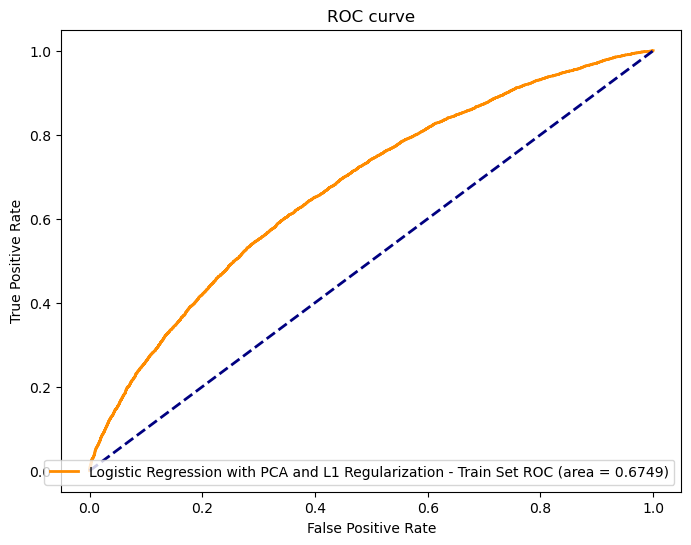

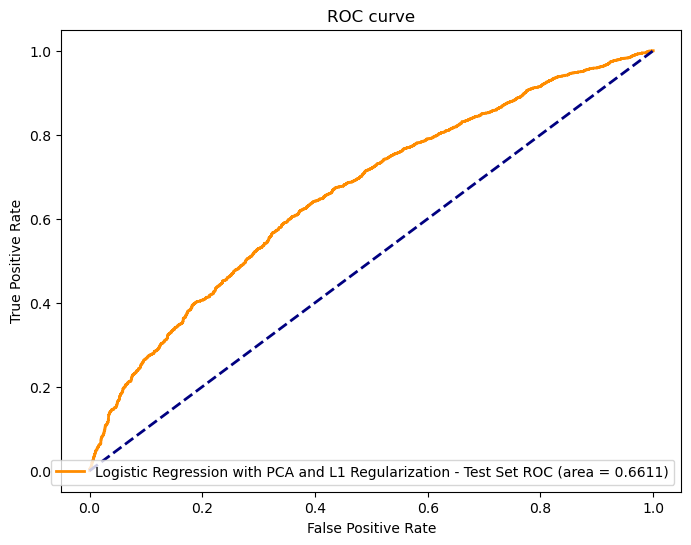

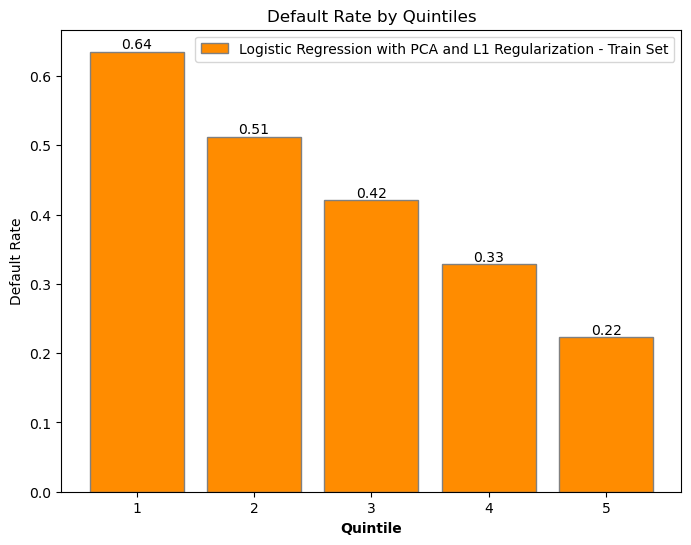

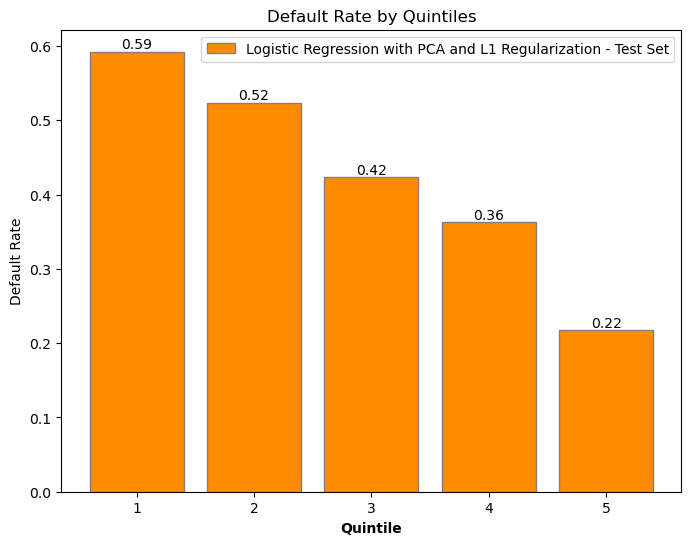

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


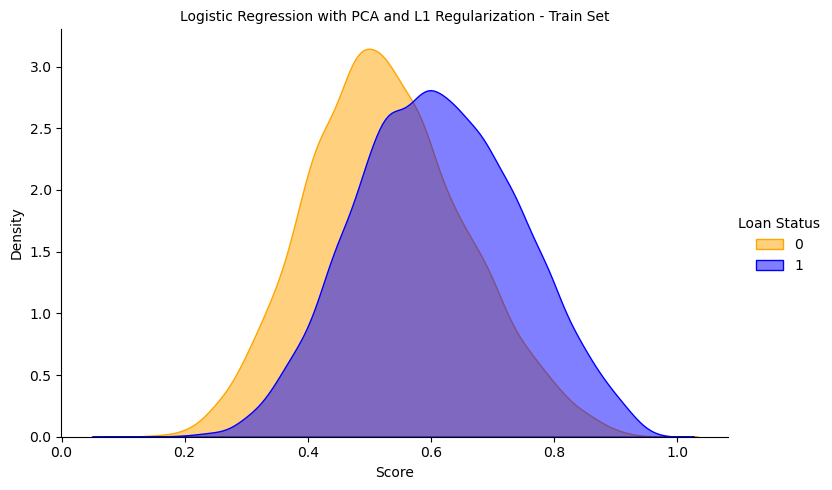

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


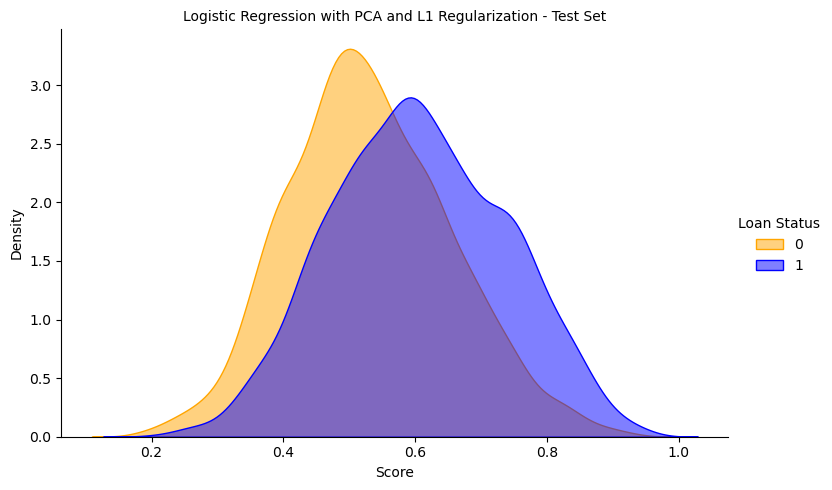

In [15]:

plot_roc_curve(y_train_pred_proba_pca, y_train, "Logistic Regression with PCA and L1 Regularization - Train Set")
plot_roc_curve(y_test_pred_proba_pca, y_test, "Logistic Regression with PCA and L1 Regularization - Test Set")


default_rate_by_quintile(y_train_pred_proba_pca, y_train, "Logistic Regression with PCA and L1 Regularization - Train Set")
default_rate_by_quintile(y_test_pred_proba_pca, y_test, "Logistic Regression with PCA and L1 Regularization - Test Set")


metrics_df_train_pca_l1 = calculate_metrics(y_train_pred_proba_pca, y_train_pred_pca, y_train)
metrics_df_test_pca_l1 = calculate_metrics(y_test_pred_proba_pca, y_test_pred_pca, y_test)



plot_density(y_train_pred_proba_pca, y_train, "Logistic Regression with PCA and L1 Regularization - Train Set")
plot_density(y_test_pred_proba_pca, y_test, "Logistic Regression with PCA and L1 Regularization - Test Set")



# Comparación entre ambos modelos

In [16]:

print("Metrics for Logistic Regression (Significant Features) - Test Set")
print(metrics_df_sig_test)

print("\nMetrics for Logistic Regression with PCA and L1 Regularization - Test Set")
print(metrics_df_test_pca_l1)


Metrics for Logistic Regression (Significant Features) - Test Set
                    Metric     Score
0  Average Precision Score  0.690523
1                   Recall  0.790681
2                 F1 Score  0.702660
3                      AUC  0.638440
4              Brier Score  0.230599

Metrics for Logistic Regression with PCA and L1 Regularization - Test Set
                    Metric     Score
0  Average Precision Score  0.718899
1                   Recall  0.775269
2                 F1 Score  0.705134
3                      AUC  0.661133
4              Brier Score  0.225418


Se concluye que en términos del AUC, la regresión logística con Regularización L1 es mejor modelo que la regresión logística base con selección de variables.